<a href="https://colab.research.google.com/github/mazimum86/Neural-Networks/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import tensorflow
import tensorflow as tf

In [2]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [21]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255., X_test/255.
print("X_train.shape: ", X_train.shape)

X_train.shape:  (60000, 28, 28)


In [22]:
# the data is only 2D!
# convolution expects height x width x color
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [23]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [24]:
# Build the model using the functional API
i = Input (shape=X_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation="relu")(i)
x= Conv2D(64,(3,3),strides=2,activation="relu")(x)
x= Conv2D(128,(3,3),strides=2,activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x=Dense(512,activation="relu")(x)
x = Dropout(0.2)(x)
x=Dense(K,activation="softmax")(x)

model = Model(i,x)

In [25]:
X_train[0].shape

(28, 28, 1)

In [26]:
X_train.shape

(60000, 28, 28, 1)

In [29]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

r = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=15,batch_size=None)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3067 - accuracy: 0.8848 - val_loss: 0.3163 - val_accuracy: 0.8840
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2730 - accuracy: 0.8979 - val_loss: 0.3192 - val_accuracy: 0.8865
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2503 - accuracy: 0.9060 - val_loss: 0.2936 - val_accuracy: 0.8977
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2241 - accuracy: 0.9144 - val_loss: 0.3019 - val_accuracy: 0.8955
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2105 - accuracy: 0.9202 - val_loss: 0.2859 - val_accuracy: 0.9004
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1956 - accuracy: 0.9241 - val_loss: 0.2996 - val_accuracy: 0.8970
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1818 - accuracy: 0.9305 - val_loss: 0.3114 - val_accuracy

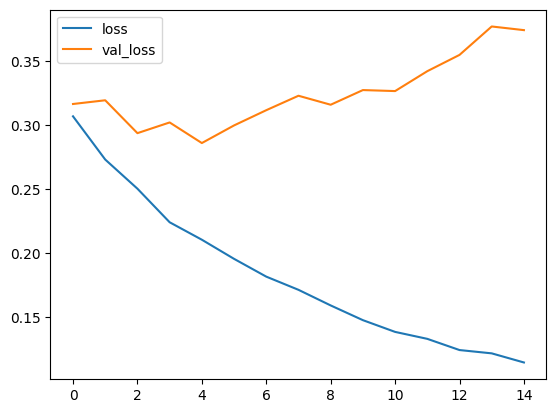

In [30]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

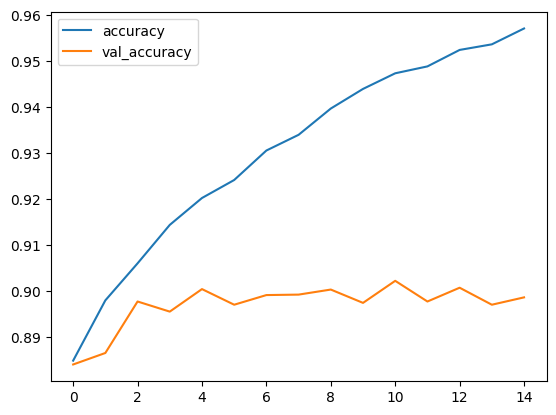

In [31]:
# Plot accuracy per iteration

plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

In [32]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix
# the values gotten here is the probability of each outcome computed by softmax
y_pred_probability = model.predict(X_test)

# Compute the actual predicted values
actual_y_pred = list(np.round(y_pred_probability)) # start by rounding each values in various positions
actual_y_pred = [x.argmax() for x in actual_y_pred] # get the index of the max values of each test data

313/313 [==============================] - 1s 2ms/step


In [34]:
# Manual evaluation
acc=np.mean(y_test == actual_y_pred)
# this is the manual accuracy
print(f"Manual accuracy: {acc*100:.2f}%")

Manual accuracy: 89.51%


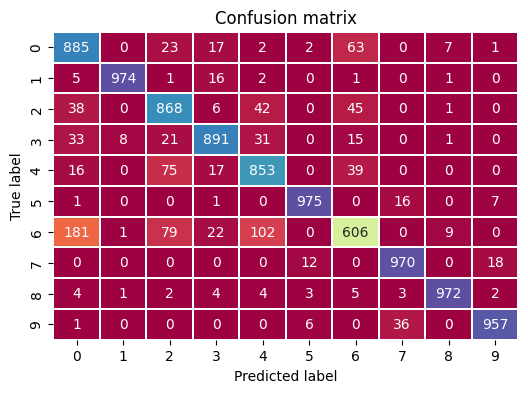

In [41]:
import seaborn as sns
cm = confusion_matrix(y_test,actual_y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,linewidths=.2,cmap="Spectral",cbar=False,fmt="g")
plt.title("Confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label");

In [46]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
'''.split()

In [55]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'boot']

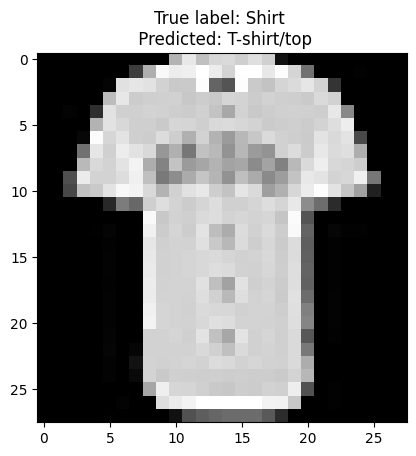

In [56]:
# Show some misclassified examples
misclassified_idx = np.where(y_test != actual_y_pred)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s \n Predicted: %s" % (labels[y_test[i]],labels[actual_y_pred[i]]));